## Logistic Regression

In [3]:
path = r"C:\\Users\\dell\\Documents\\Datasets\\Iris.csv"
import pandas as pd

df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

## Separate X and Y features
Y: Species

In [7]:
X = df.drop(columns=["Id", "Species"])
Y = df[["Species"]]

In [8]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## 
Data Preprocessing and Data Cleaning

In [10]:
# Data Preprocessing and Data Cleaning
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()).set_output(
    transform="pandas"
)

In [12]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## 
## Split the data into training and testing

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, train_size=0.85, random_state=42
)

In [16]:
xtrain.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
128,0.674501,-0.587764,1.047087,1.185010
131,2.492019,1.726266,1.502013,1.053537
145,1.038005,-0.124958,0.819624,1.447956
108,1.038005,-1.281972,1.160819,0.790591
143,1.159173,0.337848,1.217684,1.447956


In [17]:
xtest.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,0.310998,-0.587764,0.535296,0.001753
18,-0.173674,1.726266,-1.170675,-1.181504
118,2.249683,-1.050569,1.786341,1.447956
78,0.189830,-0.356361,0.421564,0.396172
76,1.159173,-0.587764,0.592162,0.264699


In [18]:
ytrain.head()

,Species
128,Iris-virginica
131,Iris-virginica
145,Iris-virginica
108,Iris-virginica
143,Iris-virginica


In [19]:
ytest.head()

,Species
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor


## Model Building

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

c:\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
model.coef_

array([[-1.04969806,  1.13258238, -1.83642196, -1.72346317],
       [ 0.52796351, -0.28567478, -0.35737987, -0.73259762],
       [ 0.52173456, -0.84690759,  2.19380183,  2.45606079]])

In [26]:
model.intercept_

array([-0.23044675,  1.98190364, -1.7514569 ])

## Model Evaluation

In [27]:
model.score(xtrain, ytrain)

0.968503937007874

In [28]:
model.score(xtest, ytest)

1.0

In [29]:
ypreds = model.predict(xtest)
ypreds

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [30]:
yprobs = model.predict_proba(xtest)
yprobs[:5]

array([[1.15098741e-02, 8.74162597e-01, 1.14327529e-01],
       [9.68081065e-01, 3.19185966e-02, 3.38175901e-07],
       [2.92506741e-08, 2.43211836e-03, 9.97567852e-01],
       [1.34190547e-02, 7.57473507e-01, 2.29107438e-01],
       [1.81226956e-03, 7.40573705e-01, 2.57614026e-01]])

## Confusion Matrix, Classification Report

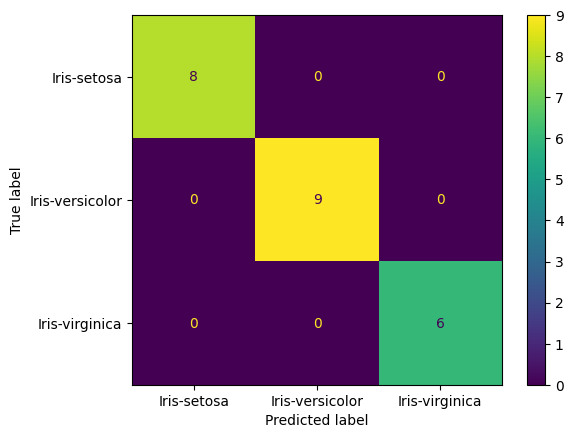

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [32]:
print(classification_report(ytest, ypreds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        23
      macro avg       1.00      1.00      1.00        23
   weighted avg       1.00      1.00      1.00        23



In [33]:
from sklearn.metrics import f1_score

In [34]:
f1_test = f1_score(ytest, ypreds, average="macro")
f1_test

1.0


### Check for cross validated scores

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain, ytrain, cv=3, scoring="f1_macro")
scores

c:\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.97701149, 0.92621871, 0.97616007])

In [36]:
scores.mean()

np.float64(0.9597967570647897)

### From the above testing scores,f1_macro scores and cross validated scores, we can consider this model for final predictions

In [37]:
path2 = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Iris%20Sample.csv"
xnew = pd.read_csv(path2)
xnew.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Unnamed: 4
0,5.40,3.75,1.7,0.4,NaN
1,5.70,2.33,3.5,1.0,NaN
2,5.72,2.70,4.1,1.2,NaN
3,4.45,3.20,1.6,0.2,NaN
4,7.20,2.80,6.1,2.0,NaN


In [38]:
xnew = xnew.drop(columns=["Unnamed: 4"])

In [39]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.537178,1.610565,-1.170675,-1.050031
1,-0.173674,-1.675357,-0.147093,-0.261193
2,-0.149440,-0.819166,0.194102,0.001753
3,-1.688272,0.337848,-1.227541,-1.312977
4,1.643844,-0.587764,1.331416,1.053537
5,2.492019,1.379162,1.502013,1.053537


### Out of sample predictions, saving of data to dataframe and saving the results to csv file

In [40]:
final_preds = model.predict(xnew_pre)
final_preds

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [41]:
xnew["Species Predicted"] = final_preds
xnew

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species Predicted
0,5.40,3.75,1.7,0.4,Iris-setosa
1,5.70,2.33,3.5,1.0,Iris-versicolor
2,5.72,2.70,4.1,1.2,Iris-versicolor
3,4.45,3.20,1.6,0.2,Iris-setosa
4,7.20,2.80,6.1,2.0,Iris-virginica
5,7.90,3.65,6.4,2.0,Iris-virginica


In [42]:
xnew.to_csv("Species Predicted.csv", index=False)